In [5]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
df1 = pd.read_csv('장애인취업률포함.csv')
df1

,동별,연도별 평균 증감율,장애인연금_대상자에서수급자비율,연금 미수급자중 시설 필요자 수,심한장애중_장애인연금_대상자비율,심않장중_기초및차상위_비율,장애인취업률
0,강남구,-0.7,0.64,57,0.56,0.29,0.045910
1,강동구,1.4,0.63,60,0.54,0.20,0.009670
2,강북구,0.1,0.74,38,0.54,0.32,0.003622
3,강서구,0.2,0.76,66,0.55,0.37,0.009949
4,관악구,0.1,0.64,56,0.51,0.24,0.008510
5,광진구,-0.2,0.58,38,0.50,0.18,0.010202
6,구로구,1.3,0.65,50,0.52,0.19,0.013334
7,금천구,1.0,0.69,28,0.52,0.27,0.028888
8,노원구,-0.4,0.77,65,0.56,0.38,0.003977
9,도봉구,0.4,0.68,40,0.53,0.22,0.005556


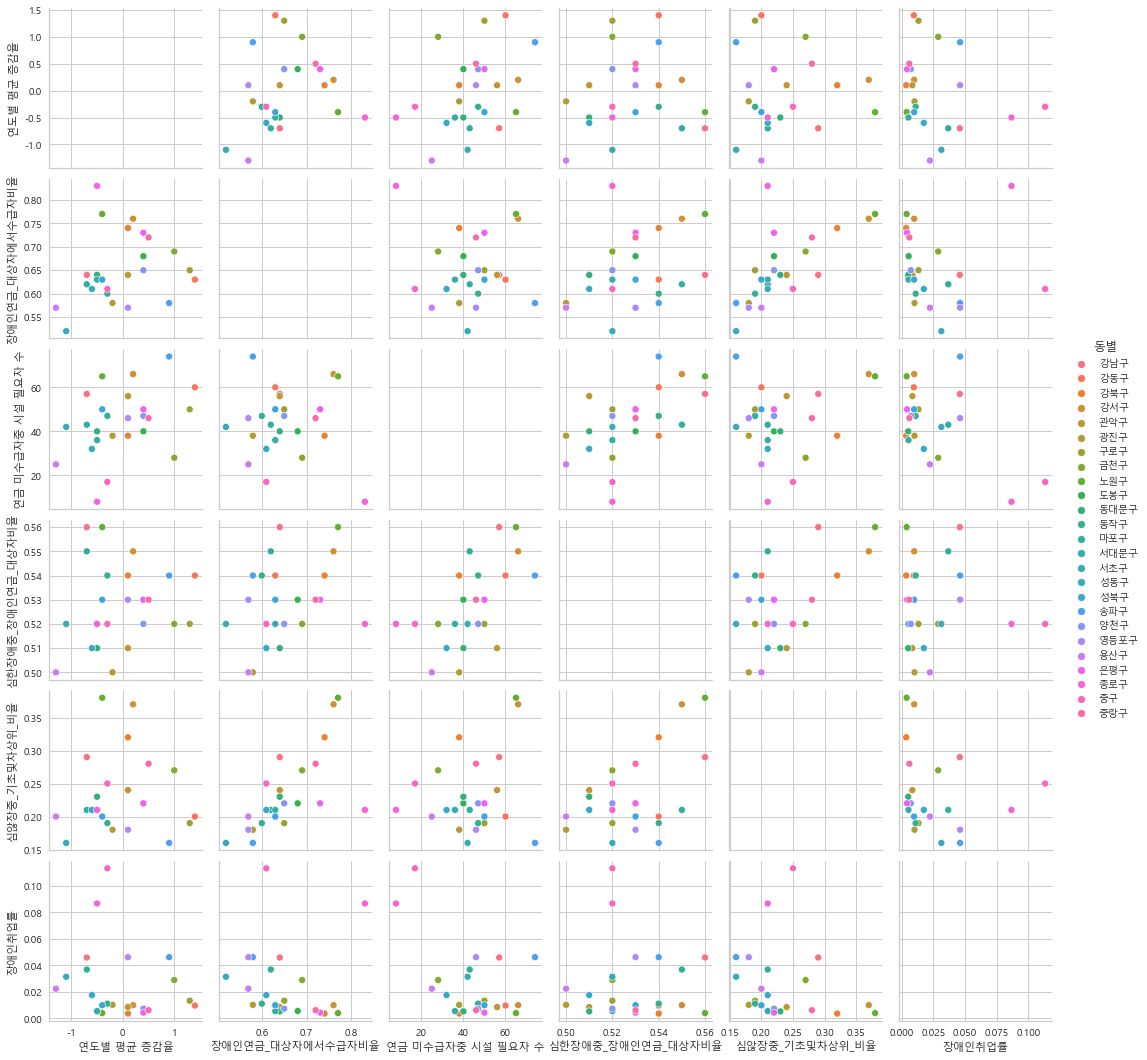

In [7]:
sns.pairplot(df1, hue="동별")
plt.show()

In [8]:
df2 = df1.set_index('동별')
df2

,연도별 평균 증감율,장애인연금_대상자에서수급자비율,연금 미수급자중 시설 필요자 수,심한장애중_장애인연금_대상자비율,심않장중_기초및차상위_비율,장애인취업률
동별,,,,,,
강남구,-0.7,0.64,57,0.56,0.29,0.045910
강동구,1.4,0.63,60,0.54,0.20,0.009670
강북구,0.1,0.74,38,0.54,0.32,0.003622
강서구,0.2,0.76,66,0.55,0.37,0.009949
관악구,0.1,0.64,56,0.51,0.24,0.008510
광진구,-0.2,0.58,38,0.50,0.18,0.010202
구로구,1.3,0.65,50,0.52,0.19,0.013334
금천구,1.0,0.69,28,0.52,0.27,0.028888
노원구,-0.4,0.77,65,0.56,0.38,0.003977


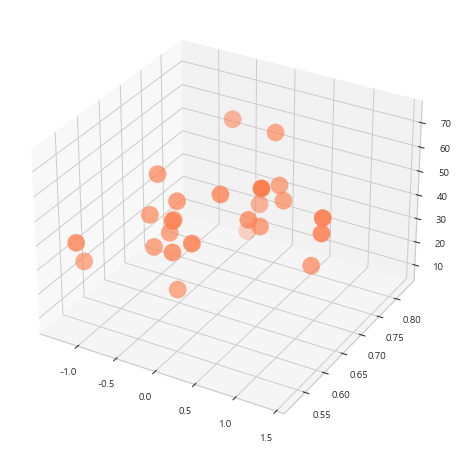

In [23]:
X = df2
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], marker='o', s=300, color='Coral')

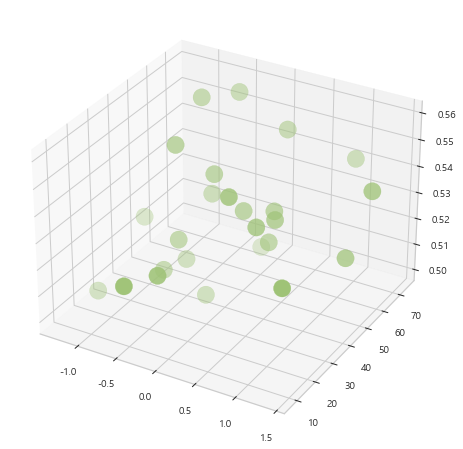

In [26]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,2], X.iloc[:,3], marker='o', s=300, color='g')

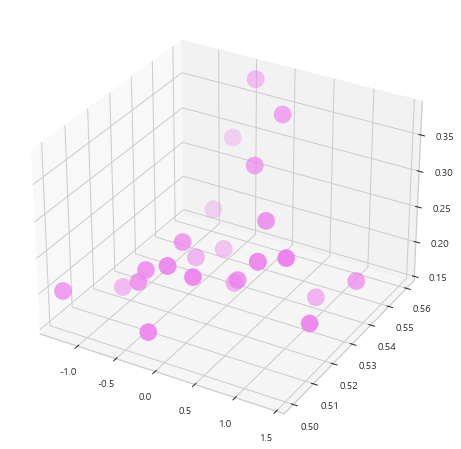

In [28]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,3], X.iloc[:,4], marker='o', s=300, color='Violet')

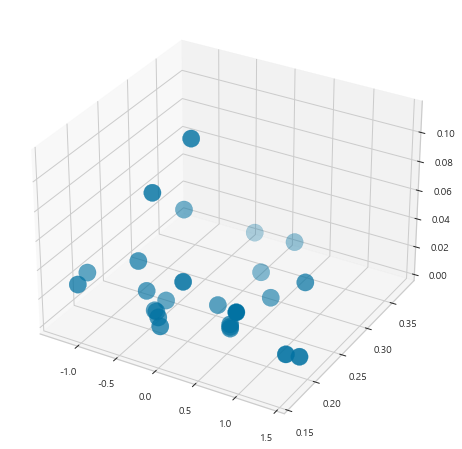

In [20]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,4], X.iloc[:,5], marker='o', s=300, cmap='Greens')

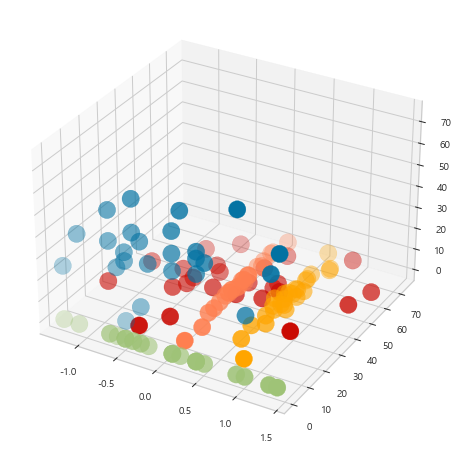

In [47]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], marker='o', s=300, color='b')
ax.scatter(X.iloc[:,0], X.iloc[:,2], X.iloc[:,3], marker='o', s=300, color='r')
ax.scatter(X.iloc[:,1], X.iloc[:,2], X.iloc[:,3], marker='o', s=300, color='Orange')
ax.scatter(X.iloc[:,0], X.iloc[:,4], X.iloc[:,5], marker='o', s=300, color='g')
ax.scatter(X.iloc[:,5], X.iloc[:,2], X.iloc[:,4], marker='o', s=300, color='Coral')